<a href="https://colab.research.google.com/github/farhanasajeer/github/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/winequalityN.csv')

In [ ]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.shape

(6497, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

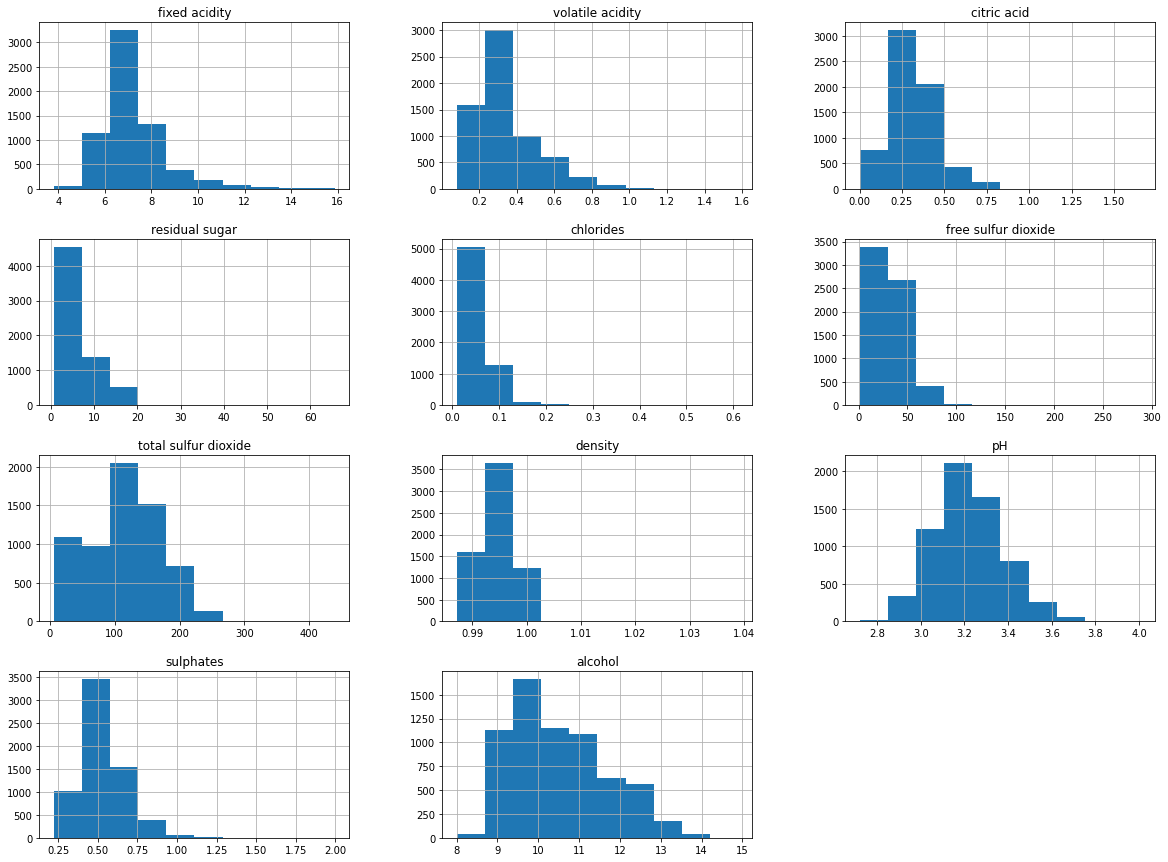

In [ ]:
dgraph=data.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show()

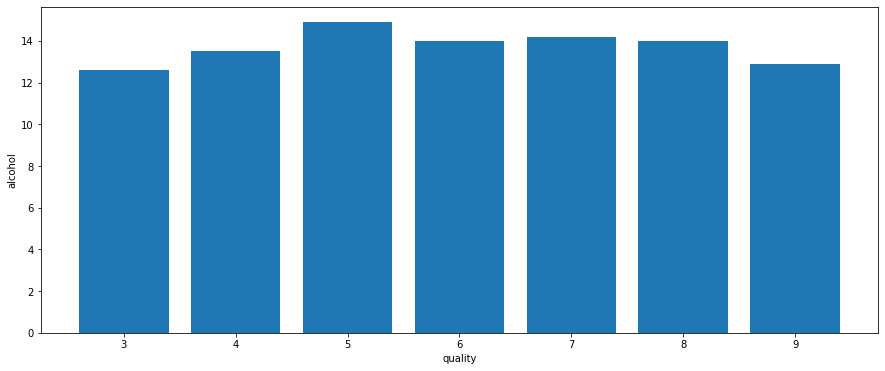

In [27]:

plt.figure(figsize=[15,6])
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [ ]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
data['fixed acidity']=data['fixed acidity'].fillna(data['fixed acidity'].median())
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [ ]:
for i in ['volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'pH', 'sulphates']:
       data[i]=data[i].fillna(data[i].median())
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.type.nunique()

2

In [36]:
data=pd.get_dummies(data)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


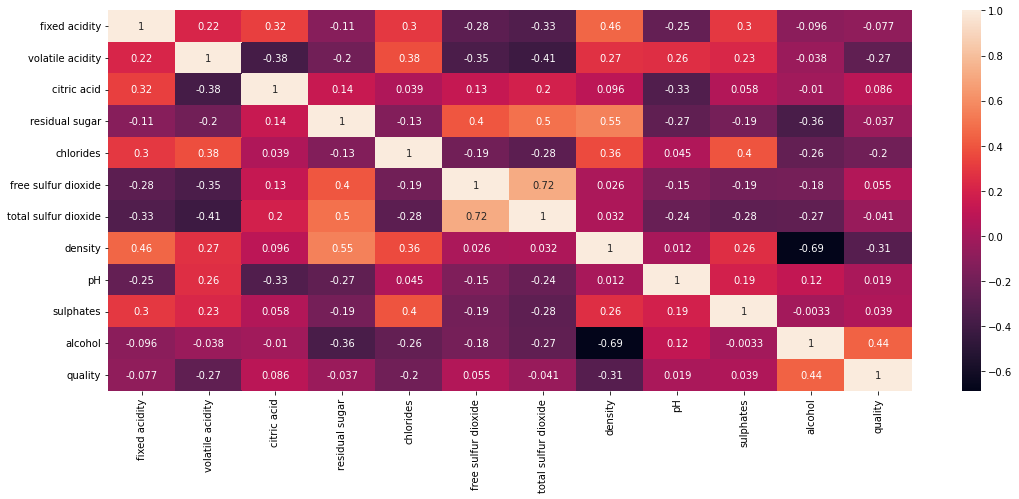

In [30]:

# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sns.heatmap(data.corr(),annot=True)
plt.show()

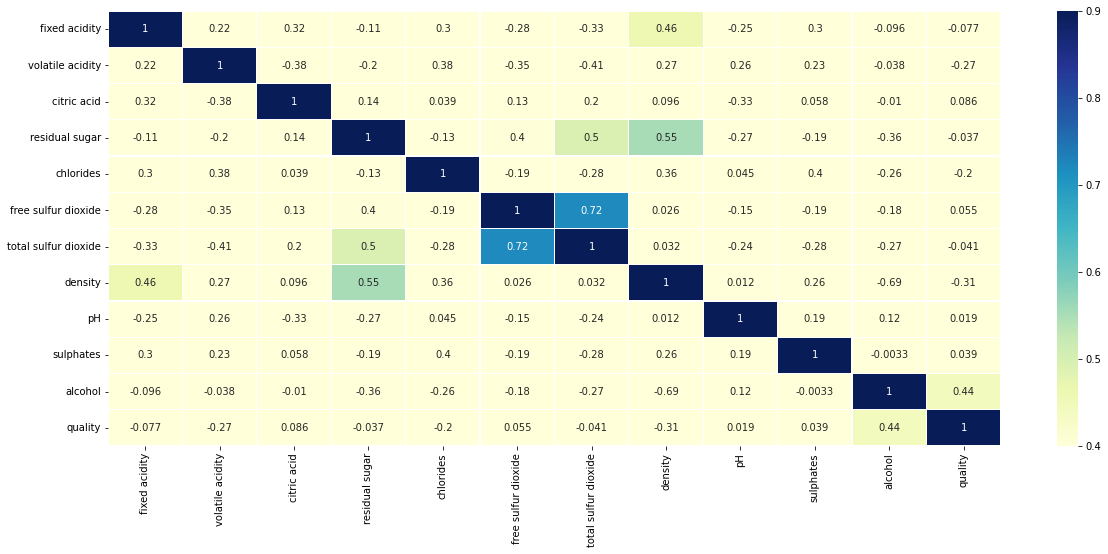

In [15]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [37]:
colm = []
# loop for columns
for i in range(len(data.corr().keys())):
# loop for rows
  for j in range(j):
    if abs(data.corr().iloc[i,j]) > 0.7:
      colm = data.corr().columns[i]

In [39]:

# drop column
new_df = data.drop('total sulfur dioxide',axis = 1)

In [40]:
# no of categorical columns
cat = new_df.select_dtypes(include='O')
# create dummies of categorical columns
df_dummies = pd.get_dummies(new_df,drop_first = True)
print(df_dummies)

      fixed acidity  volatile acidity  ...  type_red  type_white
0               7.0             0.270  ...         0           1
1               6.3             0.300  ...         0           1
2               8.1             0.280  ...         0           1
3               7.2             0.230  ...         0           1
4               7.2             0.230  ...         0           1
...             ...               ...  ...       ...         ...
6492            6.2             0.600  ...         1           0
6493            5.9             0.550  ...         1           0
6494            6.3             0.510  ...         1           0
6495            5.9             0.645  ...         1           0
6496            6.0             0.310  ...         1           0

[6497 rows x 13 columns]


In [41]:
df_dummies['best quality']=[1 if x>=7 else 0 for x in data.quality]
print(df_dummies)


      fixed acidity  volatile acidity  ...  type_white  best quality
0               7.0             0.270  ...           1             0
1               6.3             0.300  ...           1             0
2               8.1             0.280  ...           1             0
3               7.2             0.230  ...           1             0
4               7.2             0.230  ...           1             0
...             ...               ...  ...         ...           ...
6492            6.2             0.600  ...           0             0
6493            5.9             0.550  ...           0             0
6494            6.3             0.510  ...           0             0
6495            5.9             0.645  ...           0             0
6496            6.0             0.310  ...           0             0

[6497 rows x 14 columns]


In [44]:
# import libraries
from sklearn.model_selection import train_test_split
 
# independent variables
x = df_dummies.drop(['quality'],axis=1)
# dependent variable
y = df_dummies['quality']
 
# creating train test splits
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

In [46]:
# code
# import libraries

from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scale
norm_fit = norm.fit(xtrain)
# transformation of training data
scal_xtrain = norm_fit.transform(xtrain)
# transformation of testing data
scal_xtest = norm_fit.transform(xtest)
print(scal_xtrain)


[[0.34710744 0.1        0.22289157 ... 0.         1.         0.        ]
 [0.20661157 0.18       0.15662651 ... 0.         1.         0.        ]
 [0.24793388 0.06666667 0.18072289 ... 0.         1.         1.        ]
 ...
 [0.33884298 0.38666667 0.         ... 1.         0.         0.        ]
 [0.24793388 0.34       0.06024096 ... 1.         0.         0.        ]
 [0.19008264 0.16666667 0.19277108 ... 0.         1.         0.        ]]


In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, random_state=42, test_size=0.2)
# create linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(xtrain,ytrain)
prediction=model.predict(xtest)
# check the mse
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(ytest,prediction))

MSE is: 0.24850310322940922


In [59]:
# r2 ed value
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(ytest,prediction))

R squared value is: 0.6523456785925776


In [65]:
#import libraries
from sklearn.ensemble import RandomForestClassifier
 
# for error checking
from sklearn.metrics import mean_squared_error
 
from sklearn.metrics import classification_report
 
# create model variable
rnd = RandomForestClassifier()
 
# fit the model
fit_rnd = rnd.fit(xtrain,ytrain)
 
# checking the accuracy score
rnd_score = rnd.score(xtest,ytest)
 
print('score of model is : ',rnd_score)
 

score of model is :  0.8046153846153846


In [67]:
x_predict = list(rnd.predict(xtest))
df = {'predicted':x_predict,'original':ytest}
pd.DataFrame(df).head(10)
 


,predicted,original
3103,7,7
1419,7,7
4761,6,6
4690,6,6
4032,5,5
1297,7,7
1773,6,6
5584,5,5
561,5,5
5946,6,6
